<a href="https://colab.research.google.com/github/sepse/COVAir-Balkans/blob/main/balkan_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np 
import pandas as pd
from datetime import datetime
import folium

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

#df= pd.read_csv(url, parse_dates=['timestamp'])
pr= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/air/Prishtina.csv', sep=';')
bl= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/air/Banjaluka.csv', sep=';')
bg= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/air/Belgrade.csv', sep=';')
sk= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/air/Skopje.csv', sep=';')
tr= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/air/Tirana.csv', sep=';')
zg= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/air/Zagreb.csv', sep=';')

df = pd.concat([pr, bl, bg, sk, tr, zg], ignore_index=True)

df.head()


,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,32198,SDS011,19221,42.656,21.156,2022-03-15T00:00:21,87.80,NaN,NaN,46.95,NaN,NaN
1,32198,SDS011,19221,42.656,21.156,2022-03-15T00:02:47,82.63,NaN,NaN,45.70,NaN,NaN
2,32198,SDS011,19221,42.656,21.156,2022-03-15T00:05:17,72.38,NaN,NaN,43.35,NaN,NaN
3,32198,SDS011,19221,42.656,21.156,2022-03-15T00:07:43,77.18,NaN,NaN,42.45,NaN,NaN
4,32198,SDS011,19221,42.656,21.156,2022-03-15T00:10:09,77.50,NaN,NaN,47.35,NaN,NaN


In [106]:
df=df.drop(['sensor_type', 'durP1', 'ratioP1', 'durP2', 'ratioP2', 'location'], axis=1)
df.head(5)

,sensor_id,lat,lon,timestamp,P1,P2
0,32198,42.656,21.156,2022-03-15T00:00:21,87.80,46.95
1,32198,42.656,21.156,2022-03-15T00:02:47,82.63,45.70
2,32198,42.656,21.156,2022-03-15T00:05:17,72.38,43.35
3,32198,42.656,21.156,2022-03-15T00:07:43,77.18,42.45
4,32198,42.656,21.156,2022-03-15T00:10:09,77.50,47.35


In [107]:
df['sensor_id'] = df['sensor_id'].astype(str) 
df=df.replace(['32198', '11964', '21152', '34876', '39544', '48623'], ['Prishtina', 'Tirana', 'Belgrade', 'Banja Luka', 'Skopje', 'Zagreb'])

df.tail()

,sensor_id,lat,lon,timestamp,P1,P2
2602064,Zagreb,45.802,16.114,2021-04-23T23:47:39,15.68,9.13
2602065,Zagreb,45.802,16.114,2021-04-23T23:50:08,16.13,9.68
2602066,Zagreb,45.802,16.114,2021-04-23T23:52:38,14.02,8.35
2602067,Zagreb,45.802,16.114,2021-04-23T23:55:05,15.38,10.00
2602068,Zagreb,45.802,16.114,2021-04-23T23:57:33,20.13,9.68


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602069 entries, 0 to 2602068
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   sensor_id  object 
 1   lat        float64
 2   lon        float64
 3   timestamp  object 
 4   P1         float64
 5   P2         float64
dtypes: float64(4), object(2)
memory usage: 119.1+ MB


In [109]:
# Convert string to datetime64
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602069 entries, 0 to 2602068
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   sensor_id  object        
 1   lat        float64       
 2   lon        float64       
 3   timestamp  datetime64[ns]
 4   P1         float64       
 5   P2         float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 119.1+ MB


In [110]:
map = folium.Map(location=[44.137, 19.142577], width='40%', height='40%', tiles="CartoDB Positron", zoom_start=6)


folium.Marker(location=[42.646, 21.1485], popup="Prishtine", icon=folium.Icon(icon="cloud"),).add_to(map)
folium.Marker(location=[44.78,	17.194], popup="Banja Luka", icon=folium.Icon(icon="cloud"),).add_to(map)
folium.Marker(location=[44.792,	20.482], popup="Belgrade", icon=folium.Icon(icon="cloud"),).add_to(map)
folium.Marker(location=[41.99597,	21.418337], popup="Skopje", icon=folium.Icon(icon="cloud"),).add_to(map)
folium.Marker(location=[41.326,	19.826], popup="Tirana", icon=folium.Icon(icon="cloud"),).add_to(map)
folium.Marker(location=[45.802, 16.114], popup="Zagreb", icon=folium.Icon(icon="cloud"),).add_to(map)

map

In [111]:
print(f"The available data is between {df['timestamp'].min()} and {df['timestamp'].max()}")

The available data is between 2019-10-15 00:00:00 and 2022-05-04 23:59:02


In [112]:
type(df.index)

pandas.core.indexes.range.RangeIndex

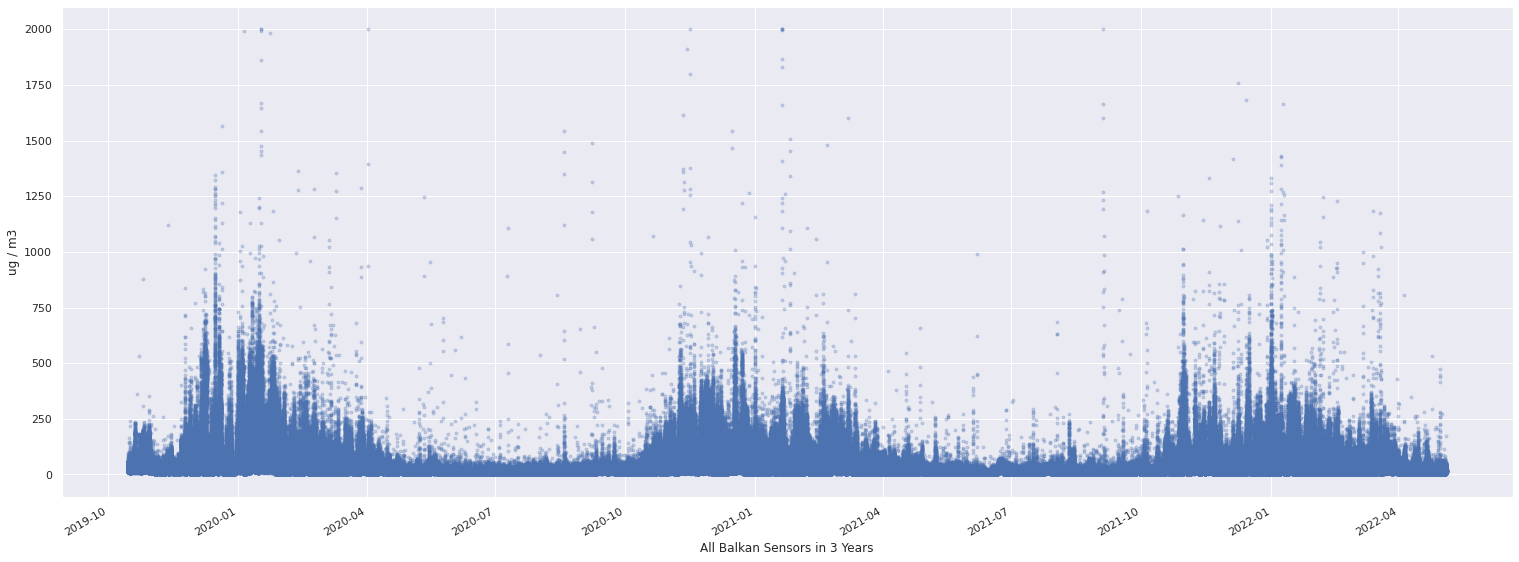

In [113]:
df.set_index('timestamp',inplace=True)
axes = df['P1'].plot(marker='.', alpha=0.25, linestyle='None', figsize=(26, 10), subplots=True)
for ax in axes:
    
    ax.set_xlabel('All Balkan Sensors in 3 Years')
    ax.set_ylabel('ug / m3')

In [114]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.timestamp]
    df['month'] = [d.month for d in df.timestamp]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(26,6), dpi= 80)
    boxplot = sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    boxplot.set(yscale="log") #yscale=log sets the boxplot to logarithmic to zoom into data
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2019, 2022]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    
    plt.show()

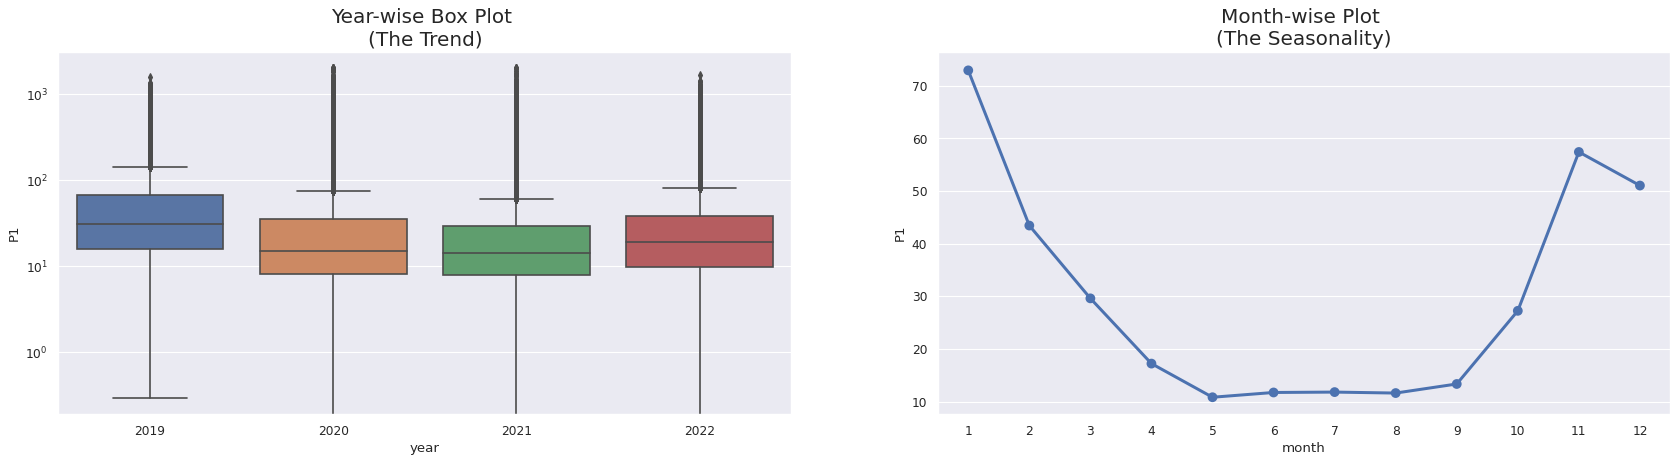

In [115]:
df.reset_index(inplace=True)
df = df.copy()
value='P1'
trend_plot(df,value)

In [116]:
pollutants = ['P1','P2']

In [117]:
def max_polluted_city(pollutant):
    x1 = df[[pollutant,'sensor_id']].groupby(["sensor_id"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [118]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [119]:
pm2_5 = max_polluted_city('P1')
pm10 = max_polluted_city('P2')

display_side_by_side(pm2_5,pm10)


,sensor_id,P1
0,Belgrade,40.440000
1,Prishtina,40.240000
2,Banja Luka,35.440000
3,Zagreb,31.570000
4,Skopje,27.130000
5,Tirana,15.540000
,sensor_id,P2
0,Belgrade,22.340000
1,Prishtina,20.770000
2,Banja Luka,18.200000


In [120]:
x2 = df[['P1','sensor_id']].groupby(["sensor_id"]).median().sort_values(by='P1',ascending=False).reset_index()
x3 = df[['P2','sensor_id']].groupby(["sensor_id"]).median().sort_values(by='P2',ascending=False).reset_index()

from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2, subplot_titles=("PM2.5","PM10"))


fig.add_trace(go.Bar( y=x2['P1'], x=x2["sensor_id"],  
                     marker=dict(color=x2['P1'], coloraxis="coloraxis")), 1, 1)


fig.add_trace(go.Bar( y=x3['P2'], x=x2["sensor_id"],  
                     marker=dict(color=x3['P2'], coloraxis="coloraxis")), 1, 2)

fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="6 Cities Median")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)

fig.show()



In [121]:
cities = ['Prishtina','Belgrade','Banja Luka','Zagreb','Tirana','Skopje']

filtered_city_day = df[df['timestamp'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.sensor_id.isin(cities)][['timestamp','sensor_id','P1','P2']]
AQI.head()





,timestamp,sensor_id,P1,P2
0,2022-03-15 00:00:21,Prishtina,87.80,46.95
1,2022-03-15 00:02:47,Prishtina,82.63,45.70
2,2022-03-15 00:05:17,Prishtina,72.38,43.35
3,2022-03-15 00:07:43,Prishtina,77.18,42.45
4,2022-03-15 00:10:09,Prishtina,77.50,47.35


Text(0.5, 1.0, 'Zagreb')

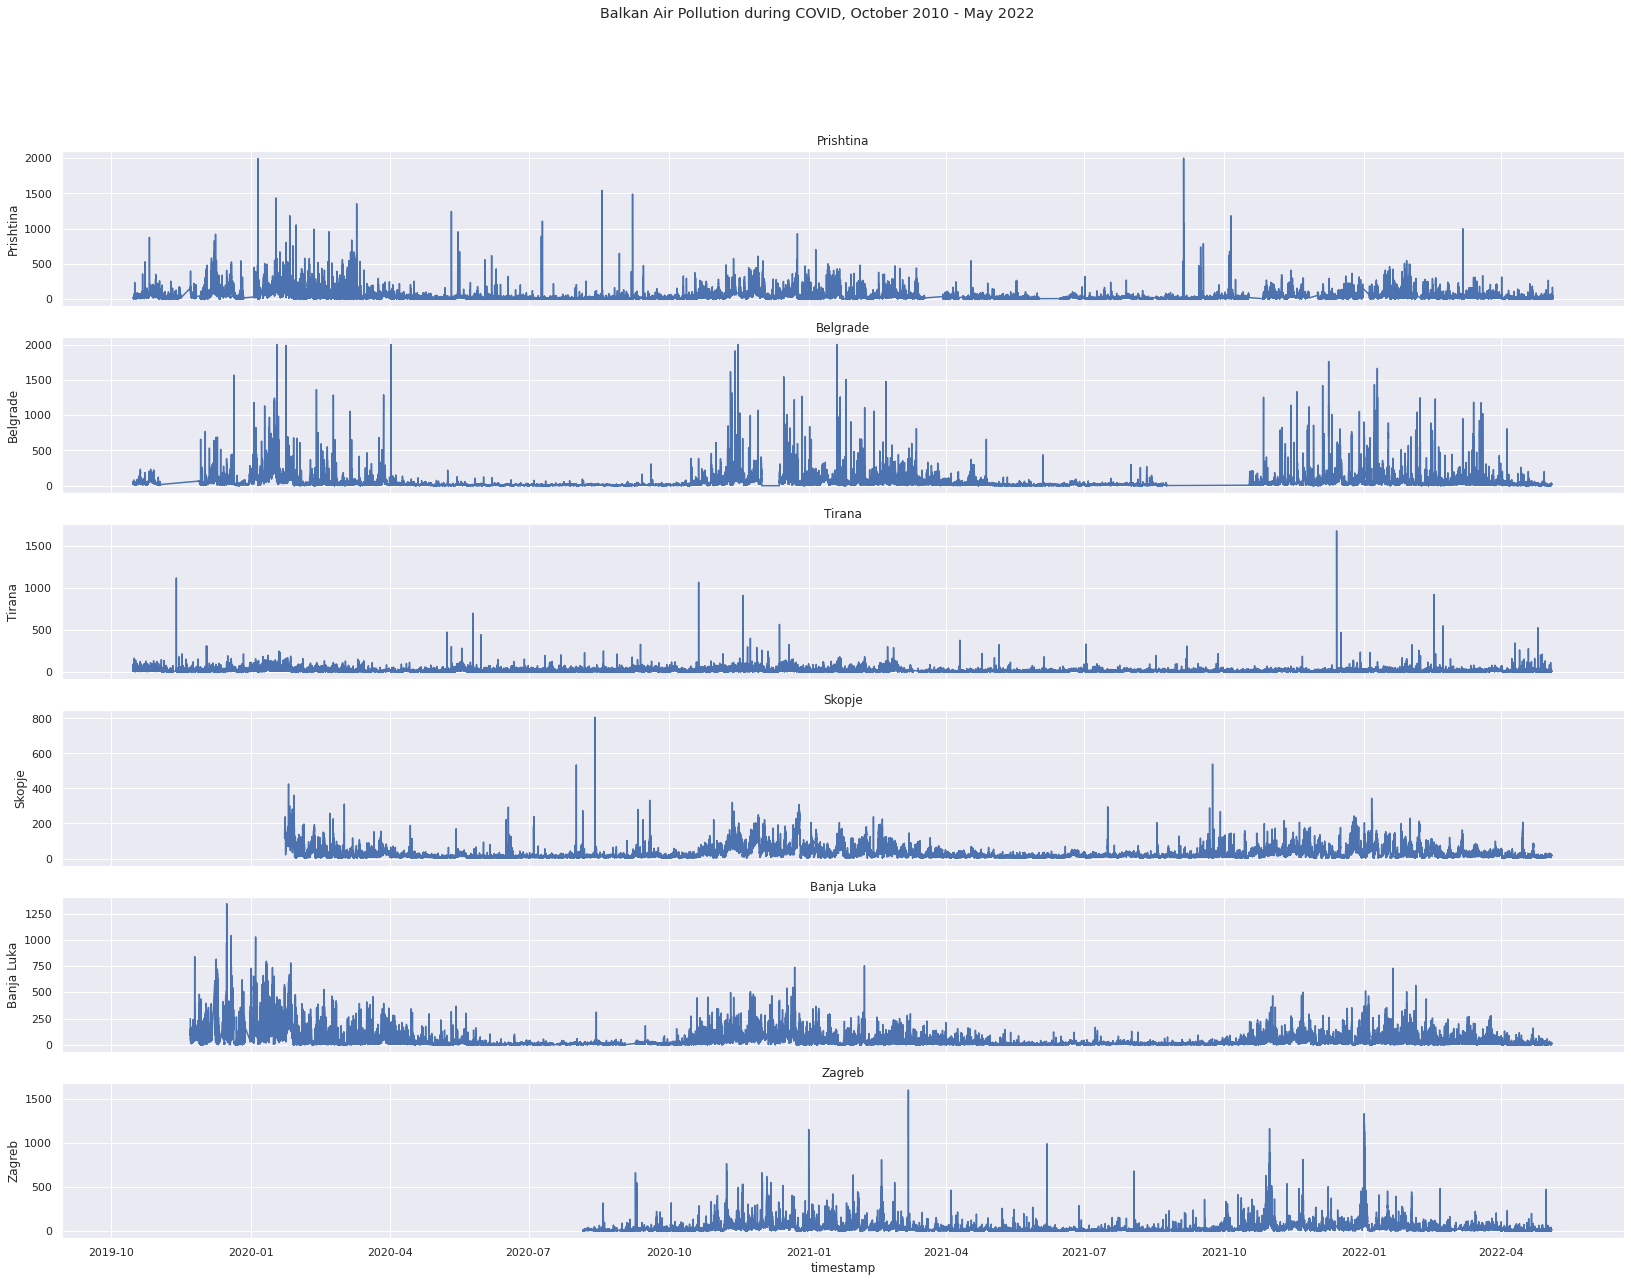

In [122]:
AQI_pivot = AQI.pivot(index='timestamp', columns='sensor_id', values='P1')

fig, axes = plt.subplots(6, 1, figsize=(28, 20), sharex=True)
fig.suptitle('Balkan Air Pollution during COVID, October 2010 - May 2022')

# Prishtina
sns.lineplot(ax=axes[0], x=AQI_pivot.index, y=AQI_pivot['Prishtina'], data=AQI_pivot).set_title("Prishtina")

# Belgrade
sns.lineplot(ax=axes[1], x=AQI_pivot.index, y=AQI_pivot['Belgrade'], data=AQI_pivot).set_title("Belgrade")

# Tirana
sns.lineplot(ax=axes[2], x=AQI_pivot.index, y=AQI_pivot['Tirana'], data=AQI_pivot).set_title("Tirana")

# Skopje
sns.lineplot(ax=axes[3], x=AQI_pivot.index, y=AQI_pivot['Skopje'], data=AQI_pivot).set_title("Skopje")

# Banja Luka
sns.lineplot(ax=axes[4], x=AQI_pivot.index, y=AQI_pivot['Banja Luka'], data=AQI_pivot).set_title("Banja Luka")

# Zagreb
sns.lineplot(ax=axes[5], x=AQI_pivot.index, y=AQI_pivot['Zagreb'], data=AQI_pivot).set_title("Zagreb")